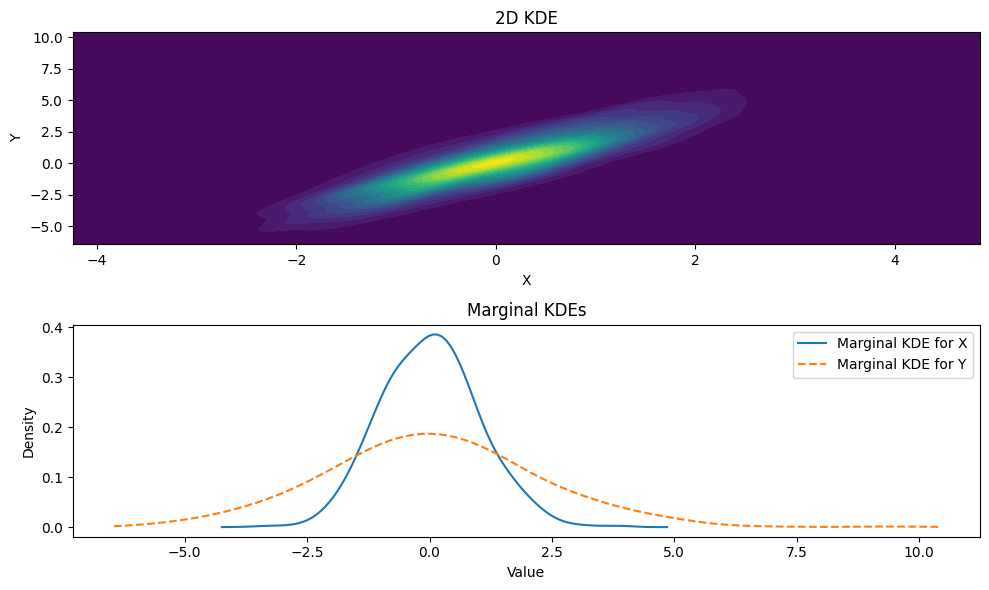

In [1]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Generate example 2D data
np.random.seed(42)
x = np.random.normal(size=500)
y = 2 * x + np.random.normal(size=500)

# Perform 2D KDE
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Define grid for evaluation
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
X, Y = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
X_grid, Y_grid = np.meshgrid(X, Y)
positions = np.vstack([X_grid.ravel(), Y_grid.ravel()])
Z = kde(positions).reshape(X_grid.shape)

# Marginalize to 1D KDE for X
P_X = Z.sum(axis=0) * (Y[1] - Y[0])  # Summing over Y-axis and scaling by grid spacing
P_Y = Z.sum(axis=1) * (X[1] - X[0])  # Summing over X-axis and scaling by grid spacing

# Normalize if necessary
P_X /= P_X.sum() * (X[1] - X[0])
P_Y /= P_Y.sum() * (Y[1] - Y[0])

# Plot the results
plt.figure(figsize=(10, 6))

# Original 2D KDE
plt.subplot(2, 1, 1)
plt.contourf(X_grid, Y_grid, Z, levels=20, cmap='viridis')
plt.title("2D KDE")
plt.xlabel("X")
plt.ylabel("Y")

# Marginal 1D KDEs
plt.subplot(2, 1, 2)
plt.plot(X, P_X, label="Marginal KDE for X")
plt.plot(Y, P_Y, label="Marginal KDE for Y", linestyle='dashed')
plt.title("Marginal KDEs")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()
